In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Crop and fertilizer dataset.csv')
data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [3]:
columns_to_remove = ['District_Name', 'Fertilizer', 'Link']
data = data.drop(columns=columns_to_remove)
data.isnull().sum()

,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0


In [4]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil_color   4513 non-null   object 
 1   Nitrogen     4513 non-null   int64  
 2   Phosphorus   4513 non-null   int64  
 3   Potassium    4513 non-null   int64  
 4   pH           4513 non-null   float64
 5   Rainfall     4513 non-null   int64  
 6   Temperature  4513 non-null   int64  
 7   Crop         4513 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 282.2+ KB


In [5]:
# Exclude non-numeric columns
numeric_dataset = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_dataset.corr()
print(corr)

             Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
Nitrogen     1.000000    0.709539   0.584315  0.182850  0.269364    -0.010213
Phosphorus   0.709539    1.000000   0.573970  0.244945  0.225453    -0.055303
Potassium    0.584315    0.573970   1.000000  0.075110  0.445671     0.053413
pH           0.182850    0.244945   0.075110  1.000000  0.097884    -0.002949
Rainfall     0.269364    0.225453   0.445671  0.097884  1.000000     0.315045
Temperature -0.010213   -0.055303   0.053413 -0.002949  0.315045     1.000000


<Axes: >

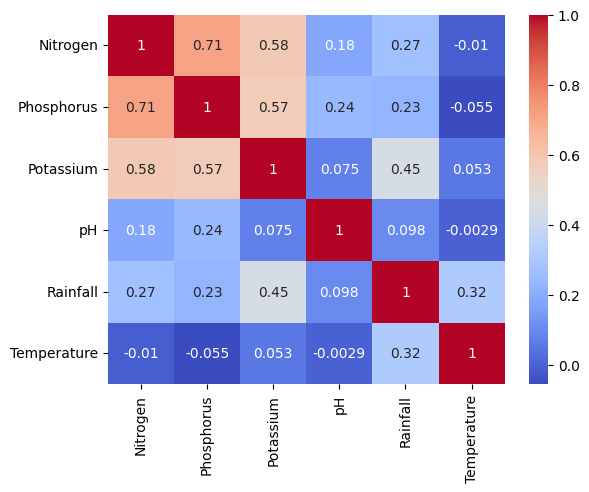

In [6]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [7]:
data['Soil_color'].unique()

array(['Black', 'Red ', 'Medium Brown', 'Dark Brown', 'Red',
       'Light Brown', 'Reddish Brown'], dtype=object)

In [8]:
# Define a mapping dictionary for Soil_Color
soil_color_mapping = {
    'Black': 1,
    'Red ': 2,
    'Medium Brown': 3,
    'Dark Brown': 4,
    'Red': 5,
    'Light Brown': 6,
    'Reddish Brown': 7
}

# Map the Soil_Color values to integers
data['Soil_color'] = data['Soil_color'].map(soil_color_mapping)

In [9]:
data.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,1,75,50,100,6.5,1000,20,Sugarcane
1,1,80,50,100,6.5,1000,20,Sugarcane
2,1,85,50,100,6.5,1000,20,Sugarcane
3,1,90,50,100,6.5,1000,20,Sugarcane
4,1,95,50,100,6.5,1000,20,Sugarcane


In [10]:
data['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

In [11]:
# Define a mapping dictionary for Crop
crop_mapping = {
    'Sugarcane': 1,
    'Jowar': 2,
    'Cotton': 3,
    'Rice': 4,
    'Wheat': 5,
    'Groundnut': 6,
    'Maize': 7,
    'Tur': 8,
    'Urad': 9,
    'Moong': 10,
    'Gram': 11,
    'Masoor': 12,
    'Soybean': 13,
    'Ginger': 14,
    'Turmeric': 15,
    'Grapes': 16
}

# Map the Crop values to integers
data['Crop'] = data['Crop'].map(crop_mapping)
data.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,1,75,50,100,6.5,1000,20,1
1,1,80,50,100,6.5,1000,20,1
2,1,85,50,100,6.5,1000,20,1
3,1,90,50,100,6.5,1000,20,1
4,1,95,50,100,6.5,1000,20,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X = data[['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
y = data['Crop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and fit the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [16]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\nClassification Report for Testing Data:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9966777408637874

Classification Report for Testing Data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00        66
           3       1.00      0.99      1.00       146
           4       1.00      1.00      1.00        64
           5       0.99      0.99      0.99       176
           6       1.00      1.00      1.00        41
           7       0.97      0.99      0.98        72
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        12
          16       1.00      1.00

In [17]:
import pickle
# Save the trained model to a file using pickle
with open('Crop_Recommendation.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully!")

Model saved successfully!
